## Restore with Care conv net

This example trains a CARE neural network to restore a blurred and noisy image. 

In [1]:
# import tensorflow and other dependencies
import tensorflow as tf
import numpy as np
import os
import cv2
from skimage.io import imread
from tnia.plotting.projections import show_xy_zy_max

## Get the list of visible devices and confirm that GPU is available
... if no GPU training will take a long time

In [2]:
visible_devices = tf.config.list_physical_devices()
print(visible_devices)

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


# Load the corrupted images and ground truth images

651.0 114519.0
0.0 535824.0
865.0 155539.0
0.0 430336.0
730.0 158740.0
0.0 603729.0
54.0 127196.0
0.0 588289.0
238.0 120704.0
0.0 580644.0
258.0 120172.0
0.0 401956.0
555.0 171385.0
0.0 622521.0
751.0 97989.0
0.0 585225.0
132.0 137441.0
0.0 638401.0
268.0 86949.0
0.0 477481.0
903.0 165726.0
0.0 591361.0
389.0 175098.0
0.0 632025.0
441.0 135789.0
0.0 619369.0
766.0 179926.0
0.0 588289.0
652.0 157354.0
0.0 603729.0
533.0 183313.0
0.0 559504.0
810.0 134819.0
0.0 638401.0
452.0 144903.0
0.0 627264.0
1644.0 137198.0
0.0 553536.0
532.0 107648.0
0.0 558009.0


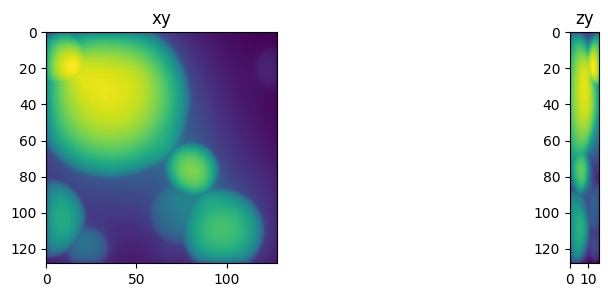

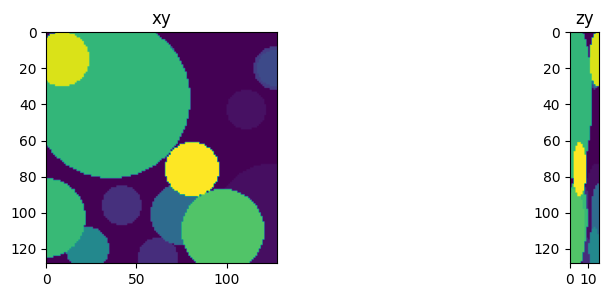

In [3]:
corrupted_dir = r"D:\images\deep-learning\simulation1\train\images"
ground_truth_dir = r"D:\images\deep-learning\simulation1\train\ground truth"
corrupted_files = os.listdir(corrupted_dir)
ground_truth_files = os.listdir(ground_truth_dir)

# Preprocess the images
X = []
Y = []
for i in range(len(corrupted_files)):
    # Load the corrupted image and ground truth image
    corrupted_img = imread(os.path.join(corrupted_dir, corrupted_files[i]), plugin='tifffile')
    ground_truth_img = imread(os.path.join(ground_truth_dir, ground_truth_files[i]), plugin='tifffile')
    # Resize the images to the desired size
    #corrupted_img = np.reshape(corrupted_img, (256, 256, 100, 1))
    #ground_truth_img = np.reshape(ground_truth_img, (256, 256, 100, 1))
    
    corrupted_img = corrupted_img[..., np.newaxis]
    ground_truth_img = ground_truth_img[..., np.newaxis]
    
    print(corrupted_img.min(), corrupted_img.max())
    print(ground_truth_img.min(), ground_truth_img.max())

    # Normalize the pixel values to [0, 1]
    corrupted_img = (corrupted_img.astype('float32')-corrupted_img.min()) / (corrupted_img.max() - corrupted_img.min())
    ground_truth_img = (ground_truth_img.astype('float32')-ground_truth_img.min()) / (ground_truth_img.max() - ground_truth_img.min()) 
    
    # Append the preprocessed images to the training set
    X.append(corrupted_img)
    Y.append(ground_truth_img)
X = np.array(X)
Y = np.array(Y)

fig = show_xy_zy_max(X[0])
fig = show_xy_zy_max(Y[0])

# Import CARE

... and setup the Config for the model

In [4]:
from csbdeep.models import Config, CARE

n_channel_in =1
n_channel_out = 1
axes = 'ZYX'

# create a CARE config
# we mostly use the default settings except in this case unet_n_depth=4, so we downsampling 4 times and can use low level features
# (consider changing the number of filters (unet_n_first) to save memory)
config = Config(axes, n_channel_in, n_channel_out, train_steps_per_epoch=20, train_epochs=50, unet_n_depth=4)
print(config)
vars(config)

Config(n_dim=3, axes='ZYXC', n_channel_in=1, n_channel_out=1, train_checkpoint='weights_best.h5', train_checkpoint_last='weights_last.h5', train_checkpoint_epoch='weights_now.h5', probabilistic=False, unet_residual=True, unet_n_depth=4, unet_kern_size=3, unet_n_first=32, unet_last_activation='linear', unet_input_shape=(None, None, None, 1), train_loss='mae', train_epochs=50, train_steps_per_epoch=20, train_learning_rate=0.0004, train_batch_size=16, train_tensorboard=True, train_reduce_lr={'factor': 0.5, 'patience': 10, 'min_delta': 0})


{'n_dim': 3,
 'axes': 'ZYXC',
 'n_channel_in': 1,
 'n_channel_out': 1,
 'train_checkpoint': 'weights_best.h5',
 'train_checkpoint_last': 'weights_last.h5',
 'train_checkpoint_epoch': 'weights_now.h5',
 'probabilistic': False,
 'unet_residual': True,
 'unet_n_depth': 4,
 'unet_kern_size': 3,
 'unet_n_first': 32,
 'unet_last_activation': 'linear',
 'unet_input_shape': (None, None, None, 1),
 'train_loss': 'mae',
 'train_epochs': 50,
 'train_steps_per_epoch': 20,
 'train_learning_rate': 0.0004,
 'train_batch_size': 16,
 'train_tensorboard': True,
 'train_reduce_lr': {'factor': 0.5, 'patience': 10, 'min_delta': 0}}

# Create the model, passing in the directory to the saved model

In [6]:
model = CARE(config, 'my_model', basedir='C:\\Users\\bnort\\work\\ImageJ2022\\tnia\\models5')

# divide the training set into training and validation sets
X_train=X[0:15]
Y_train=Y[0:15]
X_val=X[15:20]
Y_val=Y[15:20]

print(X[0].shape, Y[0].shape)
print(X_train.shape, Y_train.shape)
print(X_val.shape, Y_val.shape)

(16, 128, 128, 1) (16, 128, 128, 1)


# Train the model

In [9]:
model.train(X_train,Y_train, validation_data=(X_val,Y_val), epochs=20)

Epoch 1/20
Cause: could not parse the source code of <function _mean_or_not.<locals>.<lambda> at 0x00000124226BC4C0>: found multiple definitions with identical signatures at the location. This error may be avoided by defining each lambda on a single line and with unique argument names. The matching definitions were:
Match 0:
lambda x: K.mean(x, axis=-1)

Match 1:
lambda x: x

To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: could not parse the source code of <function _mean_or_not.<locals>.<lambda> at 0x00000124226BC4C0>: found multiple definitions with identical signatures at the location. This error may be avoided by defining each lambda on a single line and with unique argument names. The matching definitions were:
Match 0:
lambda x: K.mean(x, axis=-1)

Match 1:
lambda x: x

To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: could not parse the source code of <function _mean_or_not.

## Make and plot a prediction

In [52]:
restored = model5.predict(X_val[0], 'ZYXC')
print(restored.shape)
print(X_val[0].max(),restored.max())
fig = show_xy_zy_max(X_val[0])
fig = show_xy_zy_max(Y_val[0])
fig = show_xy_zy_max(restored)

1/1 [==============================] - 0s 275ms/step
(16, 128, 128)


## Visualize inputs and results in Napari

In [56]:
restored=np.squeeze(restored)
import napari
viewer = napari.Viewer()
viewer.add_image(np.squeeze(X_val[0]), name='corrupted')
viewer.add_image(np.squeeze(Y_val[0]), name='ground truth')
viewer.add_image(restored, name='restored')
viewer.add_image(restored5, name='restored 5')

<Image layer 'restored 5' at 0x1aba3885520>